In [1]:
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.linear_model import QuantileRegressor

In [8]:
%time
dfX = pd.read_csv('X_VAR3.csv')
dfY = pd.read_csv('Y_VAR3.csv')
Data_X=dfX.iloc[:,2]
Data_Y=dfY.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.05, random_state=0)
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

Wall time: 994 µs


### Using SKlearn Quantile Regression

In [9]:

classifiers = {}
preds=pd.DataFrame()
preds['y_test']=list(y_test)
preds['X_test']=list(X_test)
for tau in [0.1,0.3,0.5,0.7,0.9]:
    clf = QuantileRegressor(quantile=tau,solver='highs')
    clf.fit(X_train, y_train)
    preds[str(tau)] = list(clf.predict(X_test))
    classifiers[str(tau)] = { 'Coeff': clf.coef_,'Bias':clf.intercept_}
    

Wall time: 0 ns


In [10]:
pd.DataFrame(classifiers)

,0.1,0.3,0.5,0.7,0.9
Coeff,[0.0],[0.0],[0.0],[0.0],[0.0]
Bias,-2.157387,-0.862965,0.016158,0.906479,2.191406


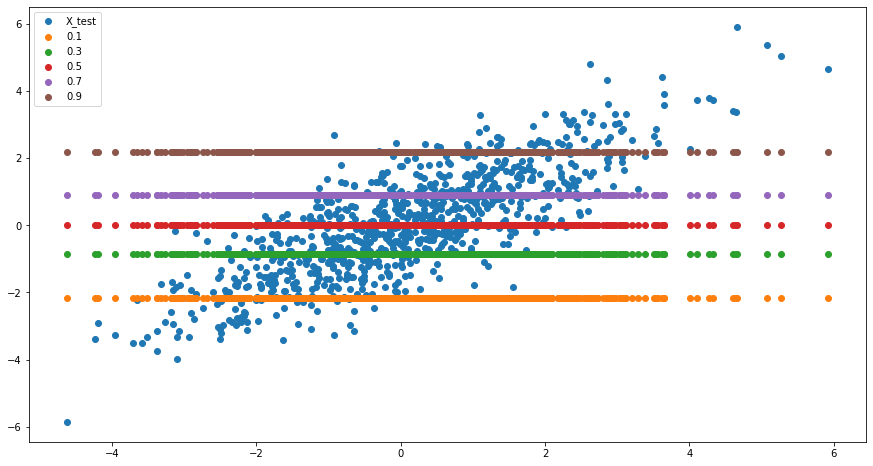

In [17]:
plt.figure(figsize=(15, 8))
plt.scatter(X_test,y_test,label="X_test")
plt.scatter(X_test,preds['0.1'],label='0.1')
plt.scatter(X_test,preds['0.3'],label='0.3')
plt.scatter(X_test,preds['0.5'],label='0.5')
plt.scatter(X_test,preds['0.7'],label='0.7')
plt.scatter(X_test,preds['0.9'],label='0.9')
plt.legend()
plt.show()

### Using Lightgbm

In [19]:
preds2=pd.DataFrame()
preds2['X_test']=list(X_test)
preds2['y_test']=list(y_test)
for tau in [0.1,0.3,0.5,0.7,0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds2[str(tau)] = list(clf.predict(X_test))

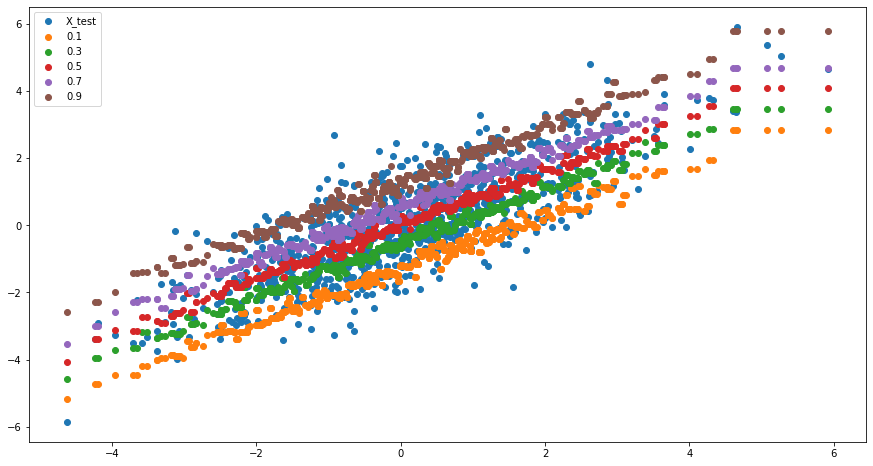

In [20]:
plt.figure(figsize=(15, 8))
plt.scatter(X_test,y_test,label="X_test")
plt.scatter(X_test,preds2['0.1'],label='0.1')
plt.scatter(X_test,preds2['0.3'],label='0.3')
plt.scatter(X_test,preds2['0.5'],label='0.5')
plt.scatter(X_test,preds2['0.7'],label='0.7')
plt.scatter(X_test,preds2['0.9'],label='0.9')
plt.legend()
plt.show()